<a href="https://colab.research.google.com/github/molnaredom/melytanulas/blob/main/m%C3%A9lytanul%C3%A1s.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dokumentáció**

https://docs.google.com/document/d/14W1howYV8TCEDbZITHbYIpD_vMSsvbOTG4_msmGppHw/edit




# Adatok beolvasása

In [19]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [20]:
# Default settings
def set_df_disp(maxrow=False, max_col=False, maxwidth=False, maxcolwidth=False):
    """
    :param maxrow:
    :param max_col:
    :param maxwidth:
    :param maxcolwidth:
    :return:
    """
    if maxrow:
        pd.set_option('display.max_rows', None)
    if max_col:
        pd.set_option('display.max_columns', None)
    if maxwidth:
        pd.set_option('display.width', None)
    if maxcolwidth:
        pd.set_option('display.max_colwidth', -1)

set_df_disp(maxwidth= True, maxcolwidth=True, max_col=True, maxrow=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


In [21]:
# data reading


data = pd.read_csv("https://raw.githubusercontent.com/molnaredom/melytanulas/main/train_data.csv", sep=',', error_bad_lines=False)

#normalize data
scaler = MinMaxScaler()
data=pd.DataFrame(scaler.fit_transform(data),
            columns=data.columns, index=data.index) 

# shuffle train data, with seed
data_shuffled = data.sample(frac=1, random_state=1)

# label
print(data_shuffled.head())

     Subject id  Jitter (local)  Jitter (local absolute)  Jitter (rap)  \
705  0.692308    0.049062        0.046388                 0.029042       
447  0.435897    0.681728        0.274632                 0.572165       
748  0.717949    0.117581        0.194259                 0.093664       
592  0.564103    0.201043        0.249267                 0.213226       
80   0.076923    0.027844        0.020793                 0.036963       

     Jitter (ppq5)  Jitter (ddp)  Shimmer (local)  Shimmer (local dB)  \
705  0.024441       0.029125      0.189127         0.323147             
447  0.412971       0.572225      0.576942         0.676853             
748  0.065745       0.093743      0.342086         0.475936             
592  0.128297       0.213217      0.324564         0.474026             
80   0.019909       0.036961      0.170029         0.263560             

     Shimmer (apq3)  Shimmer (apq5)   Shimmer (apq11)  Shimmer (dda)  \
705  0.114358        0.073997        0.17542

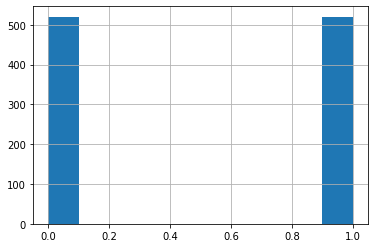

In [22]:
data_shuffled["class information"].hist( )

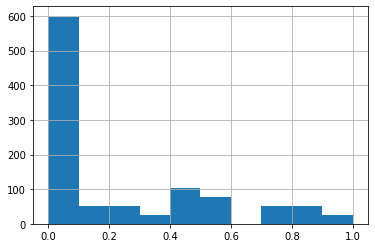

In [23]:
data_shuffled["UPDRS"].hist( )

In [24]:
# separate train data for train and validation dataframe
train = data_shuffled.iloc[:800,:]
validation = data_shuffled.iloc[800:,:]

# separate dataframes for label and features df
train_class_label = train["class information"]
train_UPDRS_label = train["UPDRS"]
train_features = train.iloc[:,2:-2] 

validation_class_label = validation["class information"]
validation_UPDRS_label =validation["UPDRS"]
validation_features = validation.iloc[:,2:-2]

# train_label = (train_class_label +train_UPDRS_label) /2
# val_label = (validation_class_label + validation_UPDRS_label) /2

print("Shapes",
      "\ntrain_class_label" , train_class_label.shape,
      "\ntrain_UPDRS_label", train_UPDRS_label.shape,
      "\ntrain_features:", train_features.shape,

      "\n\nvalidation_class_label:",validation_class_label.shape,
      "\nvalidation_UPDRS_label:",validation_UPDRS_label.shape,
      "\nvalidation_features:", validation_features.shape, 
      )

Shapes 
train_class_label (800,) 
train_UPDRS_label (800,) 
train_features: (800, 25) 

validation_class_label: (240,) 
validation_UPDRS_label: (240,) 
validation_features: (240, 25)


In [25]:
# Read test datas
test_data = pd.read_csv("https://raw.githubusercontent.com/molnaredom/melytanulas/main/test_data.csv",
                                       sep=',', error_bad_lines=False)

shuffled_test_data = test_data.sample(frac=1, random_state=1)

test_class_label = shuffled_test_data["class information"]
test_features =shuffled_test_data.iloc[:,1:-1] # 1-st col Subject id thrown, -1col labels ignored

print("test_data's shape:",shuffled_test_data.shape)

test_data's shape: (168, 28)


# Baseline


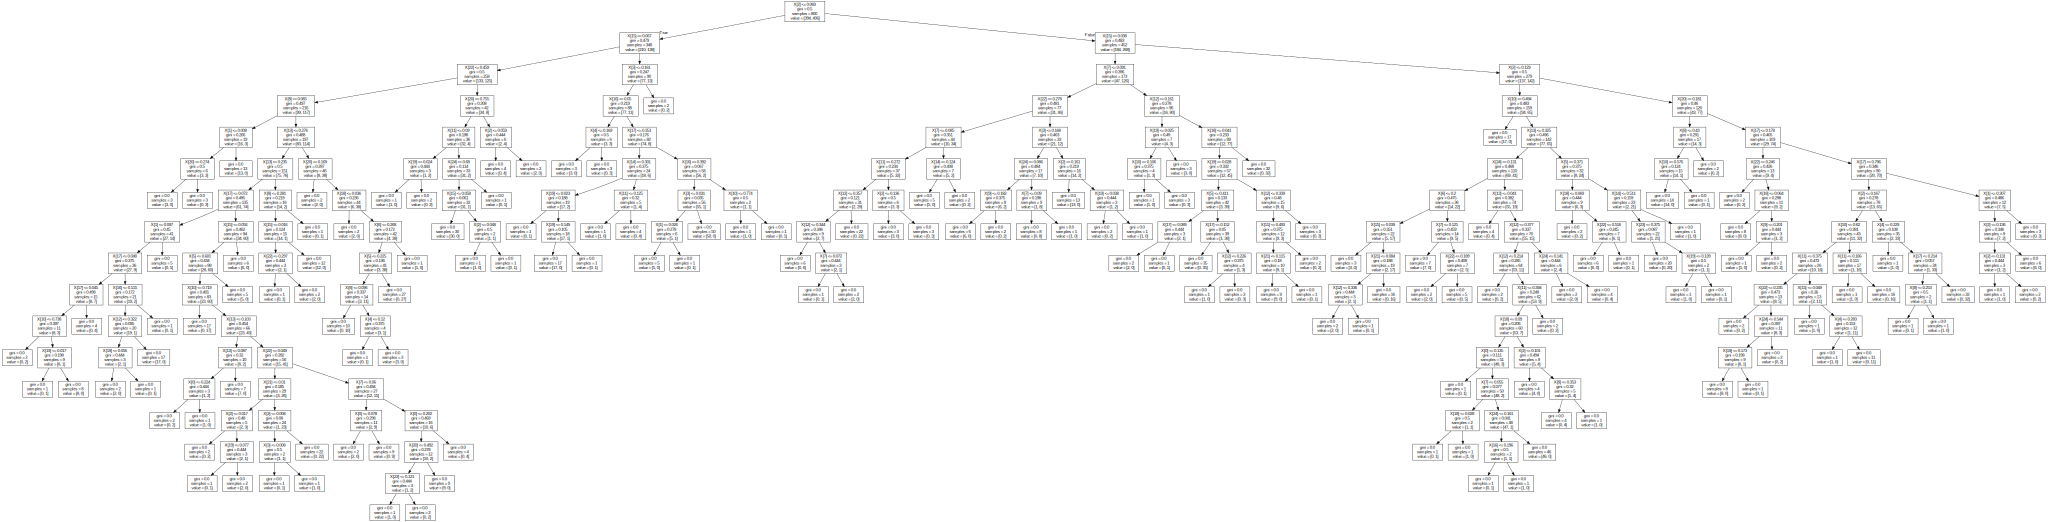

In [26]:
# decision tree
from sklearn import tree
import pydot
import graphviz
dt = tree.DecisionTreeClassifier()
dt.fit(train_features, train_class_label)


!apt-get -qq install -y graphviz && pip install -q pydot
!pip install graphviz
graphviz.Source(tree.export_graphviz(dt, out_file=None))

In [27]:
# prediction
from sklearn.metrics import classification_report
prediction = dt.predict(validation_features)
print(classification_report(validation_class_label, prediction))


              precision    recall  f1-score   support

         0.0       0.67      0.62      0.64       126
         1.0       0.61      0.67      0.64       114

    accuracy                           0.64       240
   macro avg       0.64      0.64      0.64       240
weighted avg       0.64      0.64      0.64       240



# Deep Learning

In [28]:
from tensorflow import keras

model = keras.Sequential(
    [
        keras.layers.Dense(
            256, activation="relu", input_shape=(train_features.shape[-1],)
        ),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dropout(0.3),
     keras.layers.Dense(256, activation="relu"),
        keras.layers.Dropout(0.3),
     
        keras.layers.Dense(1, activation="sigmoid"),
    ]
)
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               6656      
                                                                 
 dense_6 (Dense)             (None, 256)               65792     
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               65792     
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 256)               65792     
                                                                 
 dropout_5 (Dropout)         (None, 256)              

In [29]:
counts = np.bincount(train_class_label)
print(
    "Number of positive samples in training data: {} ({:.2f}% of total)".format(
        counts[1], 100 * float(counts[1]) / len(train_class_label)
    )
)

weight_for_0 = 1.0 / counts[0]
weight_for_1 = 1.0 / counts[1]


Number of positive samples in training data: 406 (50.75% of total)


In [32]:
metrics = [
    # keras.metrics.FalseNegatives(name="fn"),
    # keras.metrics.FalsePositives(name="fp"),
    # keras.metrics.TrueNegatives(name="tn"),
    # keras.metrics.TruePositives(name="tp"),
    keras.metrics.Accuracy(name="acc"),
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
]

model.compile(
    optimizer=keras.optimizers.Adam(1e-2), loss="binary_crossentropy", metrics=metrics
)

callbacks = [keras.callbacks.ModelCheckpoint("fraud_model_at_epoch_{epoch}.h5")]
class_weight = {0: weight_for_0, 1: weight_for_1}

model.fit(
    train_features,
    train_class_label,
    batch_size=250,
    epochs=500,
    verbose=2,
    # callbacks=callbacks,
    validation_data=(validation_features, validation_class_label),
    #class_weight=class_weight,
)


Epoch 1/500
4/4 - 1s - loss: 0.1545 - acc: 0.2812 - precision: 0.9466 - recall: 0.9163 - val_loss: 3.7266 - val_acc: 0.2500 - val_precision: 0.6286 - val_recall: 0.7719 - 1s/epoch - 360ms/step
Epoch 2/500
4/4 - 0s - loss: 0.2138 - acc: 0.3262 - precision: 0.9034 - recall: 0.9212 - val_loss: 2.4202 - val_acc: 0.1875 - val_precision: 0.6696 - val_recall: 0.6754 - 67ms/epoch - 17ms/step
Epoch 3/500
4/4 - 0s - loss: 0.1927 - acc: 0.2438 - precision: 0.9637 - recall: 0.8498 - val_loss: 2.1244 - val_acc: 0.1708 - val_precision: 0.6964 - val_recall: 0.6842 - 65ms/epoch - 16ms/step
Epoch 4/500
4/4 - 0s - loss: 0.1457 - acc: 0.2537 - precision: 0.9538 - recall: 0.9163 - val_loss: 2.5747 - val_acc: 0.2042 - val_precision: 0.6803 - val_recall: 0.7281 - 72ms/epoch - 18ms/step
Epoch 5/500
4/4 - 0s - loss: 0.1457 - acc: 0.2663 - precision: 0.9444 - recall: 0.9212 - val_loss: 2.8672 - val_acc: 0.2083 - val_precision: 0.6723 - val_recall: 0.7018 - 69ms/epoch - 17ms/step
Epoch 6/500
4/4 - 0s - loss: 0.